In [1]:
# ---------------- importing reduced LAICPMS data files

    # - LAICPMS data processed using SILLS for data reduction

# --- import modules

import os
import glob
import pandas as pd
import math
import numpy as np
import plotly.express as px


# --- set working directory

base_dir = "_DATA/"

In [2]:
# --- look into working directory and create a list with selected files - .xls
os.chdir(base_dir)
txt_files = glob.glob('*.xls')

print(txt_files)
len(txt_files)

['2021_08_25-test.xls', '2021_11_29-AM.xls', '2021_11_29-PM1.xls', '2021_11_29-PM2.xls', '2021_11_30-AM.xls', '2021_11_30-AM2.xls', '2021_11_30-PM.xls', '2021_11_30-PM2.xls', '2021_12_01-AM.xls', '2021_12_01-PM.xls', '2021_12_01-PM2.xls']


11

In [3]:
# --- create a single dataframe with all files in the list

df_raw = pd.DataFrame()

    # -- loop in the file list, get relevant data and append to combined dataframe
for file in txt_files:
    print(file)
    df = pd.read_excel(file, skiprows = (0,1,2,3,4,5,6,7,9), na_values=None) #skiprows in the start of the file, before actual data
    blank_df = df.loc[df.isnull().all(1)] #creates a dataframe showing where blank lines are located

        # - here is a condition to remove everything after the relevant data (multidata input file, only first part is required)
    if len(blank_df) > 0: #check if there are indeed blank lines in the df
        first_blank_index = blank_df.index[0]  #locate index of first blank line
        df = df[:first_blank_index]  #filters data from start of dataframe up to the first blank line
    
    df_raw = pd.concat((df_raw,df),sort=False,ignore_index = True)
    

    
df_raw = df_raw.rename(columns={"Sample": "sample", "Piece": "piece", "Field": "field", "Analysis": "analysis"})

df_raw

2021_08_25-test.xls
2021_11_29-AM.xls
2021_11_29-PM1.xls
2021_11_29-PM2.xls
2021_11_30-AM.xls
2021_11_30-AM2.xls
2021_11_30-PM.xls
2021_11_30-PM2.xls
2021_12_01-AM.xls
2021_12_01-PM.xls
2021_12_01-PM2.xls


,sample,piece,field,analysis,Host,Time,Info,Li7,B11,Na23,...,Fe56,Fe57,Rb85,Sr88,Nb93,Sn118,Cs133,Ba137,Ta181,W182
0,20,B,4.0,1,bertossaite,14:36:00,NaN,<8.1678,243.017826,44286.873509,...,380.788387,<134.2921,798.763019,NaN,<0.089087,<4.4638,571.702701,NaN,<0.38684,<1.4856
1,20,B,4.0,2,bertossaite,14:41:00,NaN,4364.129983,283.372066,40731.651892,...,<170.9541,<310.2672,771.347476,NaN,<0.48308,<10.8423,706.986291,NaN,<0.89823,<4.1129
2,20,B,4.0,3b,bertossaite,14:49:00,NaN,6460.774841,236.260499,35981.020799,...,1071.500697,559.03085,745.991087,NaN,<0.31016,<7.8353,535.075053,NaN,<0.66429,<1.9577
3,20,J,1.0,1,trolleite,14:11:00,NaN,434.836112,2855.375827,37825.239581,...,3666.43071,862.006039,1900.347217,NaN,1.233901,9.757163,1143.178165,NaN,9.76354,15.726706
4,20,J,1.0,2b,trolleite,14:16:00,NaN,178.412401,1573.511157,36780.957507,...,<491.3925,<826.9806,1311.715072,NaN,<1.007,<28.6566,545.693152,NaN,<1.6585,<11.6703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,19(2),C,2,wyl,wyllieite,16:24:00,Wyl-matrix,<2.7868,<14.9017,63123.179629,...,113561.695469,94236.435981,<0.39905,1.623696,0.070576,<1.3492,<0.43114,<0.64908,<0.19826,1.02802
164,19,E,11b,3,quartz,16:06:00,NaN,8139.744285,<1131.2472,36895.330495,...,21750.053796,11944.60507,1293.324711,367.649885,<12.5783,<114.3945,111.557053,936.884638,<22.7527,<95.5103
165,19,E,11b,4,quartz,16:10:00,NaN,<116.2199,1602.664237,43288.551278,...,1539.850901,<1580.1095,1596.468023,278.828777,18.621208,151.316832,274.385185,135.987287,<10.3592,162.805301
166,4,C,8,4,trolleite,16:45:00,2shots,3160.320899,1451.754807,29383.474629,...,1266.046399,<667.382,2713.85015,<3.1026,2.093393,<25.7419,488.197384,<29.6833,<3.8746,<16.6224


In [4]:
df_data = df_raw.drop(['sample', 'piece', 'field', 'analysis', 'Host', 'Time', 'Info'], axis=1)

#separate data from metadata - only do calculation in data afterwards
df_metadata = df_raw[['sample', 'piece', 'field', 'analysis', 'Host', 'Time', 'Info']]

print(df_data.columns)

df_data

Index(['Li7', 'B11', 'Na23', 'Mg24', 'Al27', 'Si29', 'P31', 'K39', 'Ca43',
       'Ca44', 'Ti47', 'Mn55', 'Fe56', 'Fe57', 'Rb85', 'Sr88', 'Nb93', 'Sn118',
       'Cs133', 'Ba137', 'Ta181', 'W182'],
      dtype='object')


,Li7,B11,Na23,Mg24,Al27,Si29,P31,K39,Ca43,Ca44,...,Fe56,Fe57,Rb85,Sr88,Nb93,Sn118,Cs133,Ba137,Ta181,W182
0,<8.1678,243.017826,44286.873509,<1.3586,<7.6038,NaN,19621.767193,17304.44194,<2093.9036,<787.0589,...,380.788387,<134.2921,798.763019,NaN,<0.089087,<4.4638,571.702701,NaN,<0.38684,<1.4856
1,4364.129983,283.372066,40731.651892,<2.4529,<17.9401,NaN,28551.259407,12733.89934,<4745.4249,<1848.0081,...,<170.9541,<310.2672,771.347476,NaN,<0.48308,<10.8423,706.986291,NaN,<0.89823,<4.1129
2,6460.774841,236.260499,35981.020799,26.107586,<13.9121,NaN,18063.733313,18817.427948,3784.027315,2765.706974,...,1071.500697,559.03085,745.991087,NaN,<0.31016,<7.8353,535.075053,NaN,<0.66429,<1.9577
3,434.836112,2855.375827,37825.239581,1496.743447,<13.5197,NaN,19153.614296,31943.847324,<3943.1651,<1431.7765,...,3666.43071,862.006039,1900.347217,NaN,1.233901,9.757163,1143.178165,NaN,9.76354,15.726706
4,178.412401,1573.511157,36780.957507,206.10789,<43.8831,NaN,<1410.4975,36383.554954,<12348.5107,<4531.7175,...,<491.3925,<826.9806,1311.715072,NaN,<1.007,<28.6566,545.693152,NaN,<1.6585,<11.6703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,<2.7868,<14.9017,63123.179629,2901.537923,41173.872107,760.21364,120134.277192,73.471986,4276.485199,4185.040749,...,113561.695469,94236.435981,<0.39905,1.623696,0.070576,<1.3492,<0.43114,<0.64908,<0.19826,1.02802
164,8139.744285,<1131.2472,36895.330495,872.964919,90889.421741,<23673.358,62522.700636,21365.653601,75412.037448,71596.418822,...,21750.053796,11944.60507,1293.324711,367.649885,<12.5783,<114.3945,111.557053,936.884638,<22.7527,<95.5103
165,<116.2199,1602.664237,43288.551278,12965.476511,14864.742036,<13933.6769,<2743.4184,30061.625403,<27324.135,<12370.5121,...,1539.850901,<1580.1095,1596.468023,278.828777,18.621208,151.316832,274.385185,135.987287,<10.3592,162.805301
166,3160.320899,1451.754807,29383.474629,498.86357,<45.2691,<6158.0215,89935.335895,45553.496975,<11018.9869,<5382.4929,...,1266.046399,<667.382,2713.85015,<3.1026,2.093393,<25.7419,488.197384,<29.6833,<3.8746,<16.6224


In [139]:
df_data_bdl = df_data.copy()

#replace values starting with "<" (i.e. below detection limit) to value/sqrt(value)
#replace negative values with 0
# for col_name, col_values in df_data_bdl.iteritems():
#     for index, value in enumerate(col_values):
#         if type(value) is str:
#             value = value.replace('<', '')
#             value = float(value)
#             if value < 0:
#                 df_data_bdl[col_name][index] = 0
#             else:
#                 df_data_bdl[col_name][index] = (value/(math.sqrt(2)))
#         elif value < 0:
#             df_data_bdl[col_name][index] = 0    
            
            
df_data_bdl = df_data.replace({'<': np.nan},regex=True)
df_data_bdl[df_data_bdl < 0] = 0


#rename dataframe columns for simplification
df_data_bdl.columns = ['Li', 'B', 'Na', 'Mg', 'Al', 'Si','P', 'K', 'Ca43','Ca44', 
                       'Ti', 'Mn', 'Fe56', 'Fe57', 'Rb', 'Sr', 'Nb', 'Sn','Cs', 'Ba', 'Ta', 'W']


#add columns in the dataframe using iloc characters
df_data_bdl["Ca"] = df_data_bdl['Ca43'] + df_data_bdl['Ca44']
df_data_bdl["Fe"] = df_data_bdl['Fe56'] + df_data_bdl['Fe57']
df_data_bdl["NbTa"] = df_data_bdl['Nb'] + df_data_bdl['Ta']
df_data_bdl["Nb/Ta"] = df_data_bdl['Nb'] / (df_data_bdl['Ta'].replace(0, np.nan))
df_data_bdl["Li/Na"] = df_data_bdl['Li'] / df_data_bdl['Na']
df_data_bdl["K/Na"] = df_data_bdl['K'] / df_data_bdl['Na']

df_data_bdl["Na%"] = df_data_bdl['Na'] / 10000
df_data_bdl["Li%"] = df_data_bdl['Li'] / 10000
df_data_bdl["K%"] = df_data_bdl['K'] / 10000
df_data_bdl["Rb%"] = df_data_bdl['Rb'] / 10000
df_data_bdl["Cs%"] = df_data_bdl['Cs'] / 10000

df_data_bdl["B%"] = df_data_bdl['B'] / 10000

df_data_bdl["Alkalis"] = df_data_bdl['Li%'] + df_data_bdl['Na%'] + df_data_bdl['K%'] + df_data_bdl['Rb%'] + df_data_bdl['Cs%']



#combine calculated data with metadata
df_data_bdl[['sample', 'piece', 'field', 'analysis', 'Host', 'Time', 'Info']] = df_metadata[['sample', 'piece', 'field', 'analysis', 'Host', 'Time', 'Info']]

df_data_bdl['Info'] = df_data_bdl['Info'].fillna('')
# df_data_bdl = df_data_bdl.fillna(0.0)

df_data_bdl

,Li,B,Na,Mg,Al,Si,P,K,Ca43,Ca44,...,Cs%,B%,Alkalis,sample,piece,field,analysis,Host,Time,Info
0,NaN,243.017826,44286.873509,NaN,NaN,NaN,19621.767193,17304.441940,NaN,NaN,...,0.057170,0.024302,NaN,20,B,4.0,1,bertossaite,14:36:00,
1,4364.129983,283.372066,40731.651892,NaN,NaN,NaN,28551.259407,12733.899340,NaN,NaN,...,0.070699,0.028337,5.930801,20,B,4.0,2,bertossaite,14:41:00,
2,6460.774841,236.260499,35981.020799,26.107586,NaN,NaN,18063.733313,18817.427948,3784.027315,2765.706974,...,0.053508,0.023626,6.254029,20,B,4.0,3b,bertossaite,14:49:00,
3,434.836112,2855.375827,37825.239581,1496.743447,NaN,NaN,19153.614296,31943.847324,NaN,NaN,...,0.114318,0.285538,7.324745,20,J,1.0,1,trolleite,14:11:00,
4,178.412401,1573.511157,36780.957507,206.107890,NaN,NaN,NaN,36383.554954,NaN,NaN,...,0.054569,0.157351,7.520033,20,J,1.0,2b,trolleite,14:16:00,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,NaN,NaN,63123.179629,2901.537923,41173.872107,760.21364,120134.277192,73.471986,4276.485199,4185.040749,...,NaN,NaN,NaN,19(2),C,2,wyl,wyllieite,16:24:00,Wyl-matrix
164,8139.744285,NaN,36895.330495,872.964919,90889.421741,NaN,62522.700636,21365.653601,75412.037448,71596.418822,...,0.011156,NaN,6.780561,19,E,11b,3,quartz,16:06:00,
165,NaN,1602.664237,43288.551278,12965.476511,14864.742036,NaN,NaN,30061.625403,NaN,NaN,...,0.027439,0.160266,NaN,19,E,11b,4,quartz,16:10:00,
166,3160.320899,1451.754807,29383.474629,498.863570,NaN,NaN,89935.335895,45553.496975,NaN,NaN,...,0.048820,0.145175,8.129934,4,C,8,4,trolleite,16:45:00,2shots


In [140]:
df_hosts = df_data_bdl[df_data_bdl['Info'].str.contains("matri|rutile")]

df_FI = df_data_bdl[~df_data_bdl['Info'].str.contains("matri|rutile")]



df_FI = df_FI[['sample', 'piece', 'field', 'analysis', 'Host',
               'Li', 'B', 'Na', 'Mg', 'Al', 'Si', 'P', 'K', 
               'Ca43', 'Ca44', 'Ti', 'Mn','Fe56', 'Fe57', 'Rb', 
               'Sr', 'Nb', 'Sn', 'Cs', 'Ba', 'Ta', 'W', 'Ca',
               'Fe', 'NbTa', 'Nb/Ta', 'Li/Na', 'K/Na', 'Na%', 
               'Li%', 'K%', 'Rb%','Cs%', 'B%', 'Alkalis',
               'Time', 'Info']]



df_FI['sample'] = 'BU18FA' + df_FI['sample'].astype(str)
df_FI['field'] = 'ff' + df_FI['field'].astype(str).replace(('.0'),(''),regex=True)
df_FI['analysis'] = 'fi0' + df_hosts['analysis'].astype(str)


# df_FI.to_csv(base_dir+'Buranga_FI_LAICPMS_bdl.csv',index=False)

df_FI

,sample,piece,field,analysis,Host,Li,B,Na,Mg,Al,...,K/Na,Na%,Li%,K%,Rb%,Cs%,B%,Alkalis,Time,Info
0,BU18FA20,B,ff4,NaN,bertossaite,NaN,243.017826,44286.873509,NaN,NaN,...,0.390735,4.428687,NaN,1.730444,0.079876,0.057170,0.024302,NaN,14:36:00,
1,BU18FA20,B,ff4,NaN,bertossaite,4364.129983,283.372066,40731.651892,NaN,NaN,...,0.312629,4.073165,0.436413,1.273390,0.077135,0.070699,0.028337,5.930801,14:41:00,
2,BU18FA20,B,ff4,NaN,bertossaite,6460.774841,236.260499,35981.020799,26.107586,NaN,...,0.522982,3.598102,0.646077,1.881743,0.074599,0.053508,0.023626,6.254029,14:49:00,
3,BU18FA20,J,ff1,NaN,trolleite,434.836112,2855.375827,37825.239581,1496.743447,NaN,...,0.844511,3.782524,0.043484,3.194385,0.190035,0.114318,0.285538,7.324745,14:11:00,
4,BU18FA20,J,ff1,NaN,trolleite,178.412401,1573.511157,36780.957507,206.107890,NaN,...,0.989195,3.678096,0.017841,3.638355,0.131172,0.054569,0.157351,7.520033,14:16:00,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,BU18FA4,C,ff8,NaN,trolleite,1817.131781,1813.854015,25485.231543,30.366298,NaN,...,2.368727,2.548523,0.181713,6.036756,0.264373,0.039088,0.181385,9.070454,16:39:00,
164,BU18FA19,E,ff11b,NaN,quartz,8139.744285,NaN,36895.330495,872.964919,90889.421741,...,0.579088,3.689533,0.813974,2.136565,0.129332,0.011156,NaN,6.780561,16:06:00,
165,BU18FA19,E,ff11b,NaN,quartz,NaN,1602.664237,43288.551278,12965.476511,14864.742036,...,0.694447,4.328855,NaN,3.006163,0.159647,0.027439,0.160266,NaN,16:10:00,
166,BU18FA4,C,ff8,NaN,trolleite,3160.320899,1451.754807,29383.474629,498.863570,NaN,...,1.550310,2.938347,0.316032,4.555350,0.271385,0.048820,0.145175,8.129934,16:45:00,2shots


In [75]:
df_FI.describe()

,sample,piece,field,analysis,Host,Li,B,Na,Mg,Al,...,K/Na,Na%,Li%,K%,Rb%,Cs%,B%,Alkalis,Time,Info
count,120,120,120,120,120,120.0,120.0,120.000000,120.0,120.0,...,120.0,120.000000,120.0,120.0,120.0,120.0,120.0,120.000000,120,120
unique,7,6,15,18,6,111.0,111.0,113.000000,117.0,116.0,...,111.0,113.000000,111.0,111.0,111.0,112.0,111.0,113.000000,108,11
top,BU18FA20,B,ff1,fi01,bertossaite,0.0,0.0,51141.341547,0.0,0.0,...,0.0,5.114134,0.0,0.0,0.0,0.0,0.0,5.114134,15:05:00,
freq,27,44,37,24,39,10.0,10.0,7.000000,4.0,5.0,...,10.0,7.000000,10.0,10.0,10.0,9.0,10.0,7.000000,2,73


In [152]:
# --- plot binary graphs

fig = px.scatter(df_hosts, x="Nb", y="Ta",
                 hover_data=["piece",'field','analysis',"Info",'sample'],
                 width=650, height=500,
                symbol = "Host", color="Host",
                log_x=True, log_y=True)

fig.update_layout(plot_bgcolor="white",template="simple_white")

fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'))

fig.update_xaxes(ticks='inside',zeroline=True,linecolor="black",showgrid=False,mirror= "allticks")#,range=(0,20000))
fig.update_yaxes(ticks='inside',zeroline=True,linecolor="black",showgrid=False,mirror= "allticks")#,range=(0,126000))



# fig.update_xaxes(tickvals=[0,1,2,3,4,5,6,7])

fig.write_image(base_dir+"FI_B_vs_Li_nan.pdf");
fig.show()



In [30]:
#normalization function - written by Bram Paredis
def normalize(data, total=None):
    """Normalize data to 100%"""
    if total is None:
        total = data.sum(axis=1)
    return data.divide(total, axis=0) * 100


A = 'Nb'
B = 'Ta'
C = 'Ti'

#define subset within dataset
df_subset = df_FI.loc[:, [A, B, C]]

#normalize subset using function defined above
df_subset_normalized = normalize(df_subset)
#combine calculated data with metadata
df_subset_normalized[['sample', 'piece', 'field', 'analysis', 'Host', 'Info']] = df_data_bdl[['sample', 'piece', 'field', 'analysis', 'Host', 'Info']]

#ternary plot of normalized subset

fig2 = px.scatter_ternary(df_subset_normalized, a=A, b=B, c=C,
                          hover_data=["piece",'field','analysis',"Info"],
                          symbol = "Host", color="sample")

fig2.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'))

#fig.write_image("ternary_test.pdf")
fig2.show()

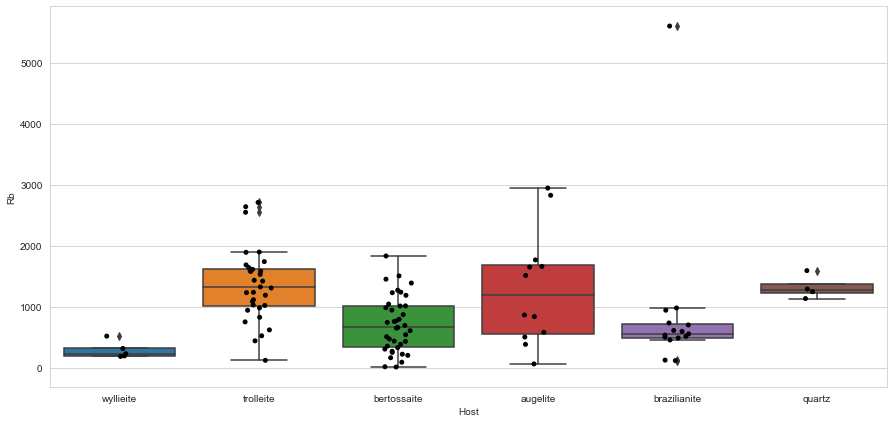

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

host_list = ['wyllieite', 'trolleite', 'bertossaite', 'augelite', 'brazilianite', 'quartz']

fig = plt.figure(figsize =(15, 7))

# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,5))

sns.set_style("whitegrid")


# Histogram + kernel density function curve

# ax = sns.displot(df_FI, x="K%", hue="Host", multiple='stack', kde=True)#col="Host"
# sns.kdeplot(data=df_FI, x="K", hue="Host")




# Boxplot + data on top

x = "Host"
y = "Rb"

ax = sns.boxplot(x=x, y=y, data=df_FI, showfliers = True, order = host_list)
# ax = sns.violinplot(x=x, y=y, data=df_FI, showfliers = False)
ax = sns.stripplot(x=x, y=y, data=df_FI, color='.0', order = host_list)
# ax.set(yscale="log")




# # Binary distribution map

# sns.displot(df_FI, x="K%", y="Na%", hue="Host", kind="kde")




# # Binary scatter plot 

# sns.scatterplot(data=df_FI, x="K%", y="Na%", hue="Host")
# ax.set_xlim([0, 12.5])




# Mixed plots

# plot = sns.jointplot(data=df_FI, x="K%", y="B%", hue="Host")

# plot.ax_marg_x.set_xlim(-2.5, 7.5)
# ax.set_ylim(0.001, 100000)



plt.show()

   

# Things to do in the code:

#### 1. Figure out a way to easily illustrate the processes